# 숫자 문자열과 영단어

In [1]:
input = "one4seveneight" # output : 1478

In [8]:
def solution(s) : 
    num_dic = {'zero' : '0', 'one' : '1', 'two' : '2', 'three' : '3', 'four' : '4',
           'five' : '5', 'six' : '6', 'seven' : '7', 'eight' : '8', 'nine' : '9'}
    for key, value in num_dic.items() : 
        s = s.replace(key, value)
    return s

In [9]:
solution(input)

'1478'

# 거리두기 확인하기 

개발자를 희망하는 죠르디가 카카오에 면접을 보러 왔습니다.

코로나 바이러스 감염 예방을 위해 응시자들은 거리를 둬서 대기를 해야 하는데 개발 직군 면접인 만큼 아래와 같은 규칙으로 대기실에 거리를 두고 앉도록 안내하고 있습니다.

- 1. 대기실은 5개이며, 각 대기실은 5×5 크기입니다.
- 2. 거리 두기를 위하여 응시자들 끼리는 맨해튼 거리가 2 이하로 앉지 말아 주세요.

- 3. 단 응시자가 앉아있는 자리 사이가 파티션으로 막혀 있을 경우에는 허용합니다.

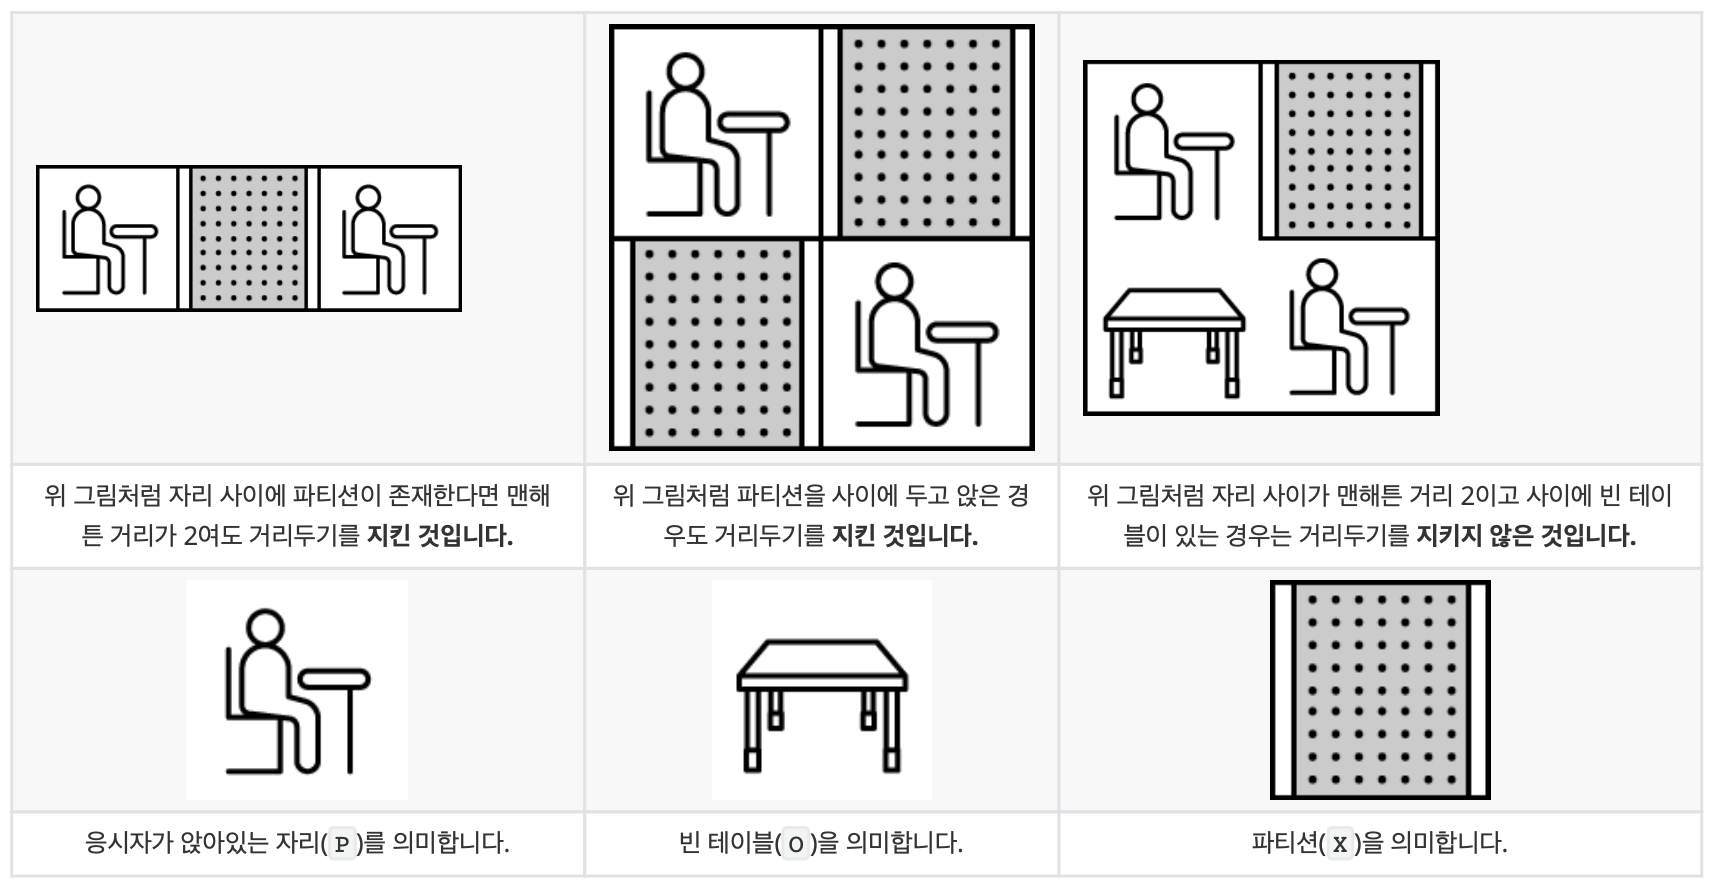

In [54]:
places = [["POOOP", "OXXOX", "OPXPX", "OOXOX", "POXXP"], 
         ["POOPX", "OXPXP", "PXXXO", "OXXXO", "OOOPP"], 
         ["PXOPX", "OXOXP", "OXPXX", "OXXXP", "POOXX"], 
         ["OOOXX", "XOOOX", "OOOXX", "OXOOX", "OOOOO"],
         ["PXPXP", "XPXPX", "PXPXP", "XPXPX", "PXPXP"]] 
# result = [1, 0, 1, 1, 1]

In [94]:
import queue 

D = ((-1, 0), (1, 0), (0, -1), (0, 1))

def bfs(place, r, c) : 
    visited = [[False for _ in range(5)] for _ in range(5)]
    visited[r][c] = True 
    q = queue.Queue()
    q.put((r, c, 0))
    
    while not q.empty() : 
        curr = q.get()
        if curr[2] > 2 : 
            continue 
        if curr[2] != 0 and place[curr[0]][curr[1]] == 'P' :
            return False 
            
        for i in range(4) : 
            nr = curr[0] + D[i][0]
            nc = curr[1] + D[i][1]
            
            if nr < 0 or nc < 0 or nr > 4 or nc > 4 : 
                continue 
                
            if visited[nr][nc] :
                continue 
            
            if place[nr][nc] == 'X' : 
                continue 
                
            visited[nr][nc] = True 
            q.put((nr, nc, curr[2] + 1 ))
    return True 

def check(place) : 
    for r in range(5) : 
        for c in range(5) : 
            if place[r][c] == 'P' :
                if bfs(place, r, c) == False :
                    return False

    return True


def solution(places) : 
    answer = []
    for place in places : 
        if check(place) :
            answer.append(1)
        else :
            answer.append(0)
    
    return answer

In [95]:
solution(places)

[1, 0, 1, 1, 1]

# 표 편집

In [96]:
n = 8
k = 2
cmd = ["D 2","C","U 3","C","D 4","C","U 2","Z","Z"]

In [125]:
class Node :
    def __init__(self) : 
        self.removed = False
        self.prev = None 
        self.next = None
        

def solution(n, k, cmd) : 
    # 줄 개수만큼의 node를 생성
    node_arr = [Node() for _ in range(n)]
    # 노드 연결
    for i in range(1, n) : 
        node_arr[i-1].next = node_arr[i]
        node_arr[i].prev = node_arr[i-1]
    
    curr = node_arr[k]
    
    # 삭제된 node 입력하는 stack
    mystack = [] 
    
    for str in cmd : 
        if str[0] == 'U' : 
            x = int(str[2:])
            for _ in range(x) : 
                curr = curr.prev 
                
        elif str[0] == 'D' : 
            x = int(str[2:])
            for _ in range(x) : 
                curr = curr.next
                
        elif str[0] == 'C' : 
            mystack.append(curr)
            curr.removed = True 
            up = curr.prev
            down = curr.next
            
            if up : 
                up.next = down 
            
            if down :
                down.prev = up 
                
            else : 
                curr = up
                
        elif str[0] == 'Z' :
            node = mystack.pop()
            node.removed = False 
            up = node.prev
            down = node.next
            
            if up : 
                up.next = node
                
            if down :
                down.prev = node
    answer = ''
    
    for i in range(n) : 
        if node_arr[i].removed :
            answer += 'X'
        else : 
            answer += 'O'            
    return answer
    
        
        

In [126]:
solution(n, k, cmd)

'OOOOXOOO'